# Ecuaciones Diferenciales Ordinarias

$$
\frac{d^2 g}{d\xi^2} = F(\xi, g, g')
$$

Estas ecuaciones se pueden escribir vectorialmente como

$$
\frac{d \vec{y}}{d\xi} = \vec{f}\left(\vec{\xi},\,\,\vec{y}\right)
$$

$$
\vec{y} = \left(\begin{matrix}
g \\ y_2
\end{matrix}\right),\,\, \vec{f} = \left(\begin{matrix}
y_2 \\ T
\end{matrix}\right)
$$

Ejemplo:
$$
\frac{d^2 y}{dx^2} + q(x)\frac{dy}{dx} = r(x)
$$

#### Una EDO de orden $N$ $\leftrightarrow$ $N$ ecuaciones de orden 1 acopladas
$$
\frac{dy_i}{dx} = F\left(x, \vec{y}\right)
$$

## Metodo *Explicito* de Euler

defs:
- $x_n = x_0 + nh$
- $y_n = y(x_n)$
- $f_n = f(x_n, y_n)$

$$\frac{dy}{dx} \sim \frac{y_{n+1} - y_n}{h} + O(h) = f_n$$

$$y_{n+1} = y_n + hf_n + O\left(h^2\right)$$

### Implicito
$$\frac{dy}{dx} = \frac{y_{n+1} - y_{n-1}}{2h}+O\left(h^2\right) = f_n$$

$$y_{n+1} = y_{n-1} + 2hf_n +O\left(h^3\right)\qquad(*)$$

El problema con este algoritmo es que es inestable, y por lo tanto los errores asociados crecen en vez de cancelarse. Ahora vamos a analizar la estabilidad del algoritmo.

## Estabilidad
### Analisis de Von Newman

Sea $\bar{y}$ la solucion exacta al __algoritmo numerico__ ($\neq$ a la solucion del problema)

$$\bar{y}_{n+1} = \bar{y}_{n-1} + 2hf\left(x_n,\,\,\bar{y}_n\right) \qquad\qquad (**)$$

Sea $\epsilon_n$ el error de maquina asociado al paso $n$

$$\implies y_n = \bar{y}_n + \epsilon_n$$

Esto se reemplaza en $(*)$ y se obtiene:
$$\bar{y}_{n+a}+\epsilon_{n+1} = \bar{y}_{n-1}+\epsilon_{n-1}+2f\left(x_n,\bar{y}_n+\epsilon_n\right)h$$

Haciendo una expansion de taylor de $f$ en torno a $\epsilon_n$:

$$f\left(x_n,\,\,\bar{y}_n+\epsilon_n\right)\sim f\left(x_n,\,\,\bar{y}_n\right) + \frac{\partial f}{\partial y}\biggr\vert_{\bar{y}_n}\epsilon_n$$
Esto despues se reemplaza en la expresion original, y aprovechando que la solucion exacta del algoritmo es $(**)$ la ecuacion queda:

$$\epsilon_{n+1} = \epsilon_{n-1} + 2h\frac{\partial f}{\partial y}\biggr\vert_{\bar{y}_n}\epsilon_n$$

El ultimo termino de esta expresion se puede asumir constante y se renombra $2h\frac{\partial f}{\partial y} = 2\gamma = $ const

Suponiendo que $\epsilon_n = \epsilon_0\lambda^n$

$$\epsilon_0\lambda^{n+1} = \epsilon_0\lambda^{n-1} + 2\gamma\epsilon_0\lambda^n$$

$$\lambda^2 - 2\gamma\lambda - 1 = 0$$

$$\lambda = \gamma\pm\sqrt{1+\gamma^2}$$

La solucion general es:

$$\epsilon_n = A\lambda_{+}^n + B\lambda_{-}^n$$

Se tienen los siguientes casos:
$$\gamma > 0 \implies \lambda_{+} > 1 \implies \epsilon_n \rightarrow \infty\quad \text{as}\quad n \rightarrow \infty$$

$$\gamma < 0 \implies \lambda_{-} < 1- \implies \epsilon_n \rightarrow \pm\infty\quad \text{as}\quad n \rightarrow \infty$$

Este algoritmo suele ser utilizado para calcular derivadas de primer orden, o resolver ecuaciones en donde el error asociado al problema es menor al error acumulado de maquina.

Buscamos un algoritmo mas estable...

## Runge-Kutta
$$\frac{dy}{dx} = f(x,y) = y'$$

1. $y_{n+1} = y_n + hy'_n + \frac{h^2}{2}y''_n + O\left(h^3\right)$
2. $y'_{n+1/2} = y'_n + \frac{h}{2}y''_n + O\left(h^2\right)$
$$\implies \frac{h^2}{2}y''_n = \left(y'_{n+1/2} - y'_n\right)h + O\left(h^3\right)$$

Reemplazando 2) en 1)
$$y_{n+1} = y_n + hy'_{n+1/2} + O\left(h^3\right)$$

$$y'_{n+1/2} = f\left(x_n + \frac{h}{2}, y_{n+1/2}\right)$$

$$y_{n+1/2} = y_n + y'_n\frac{h}{2} + \ldots$$

$$y'_{n+1/2} = f\left(x + \frac{h}{2},\,\, y_n+\frac{h}{2}f_n\right)$$

Con $f_n = y'_n$

## Implementacion

$$K_1 = hf_n$$

$$K_2 = hf\left(x_n+\frac{h}{2},\,\, y_n+\frac{K_1}{2}\right)$$

### Problema: Pendulo simple

$$\ddot{\phi} = -\frac{g}{l}\sin{\phi}$$

#### Reducir el orden:

$$\frac{d\phi}{dt} = \omega$$

$$\frac{d\omega}{dt} = -\frac{g}{l}\sin{\phi}$$

$$\frac{d}{dt}\left(
\begin{matrix}
\phi \\
\omega
\end{matrix}\right) 
= \left(
\begin{matrix}
\omega \\
-\frac{g}{l}\sin{\phi}
\end{matrix}\right)$$

#### Condiciones iniciales:

$$y[0] = \phi = \phi_0$$

$$y[1] = \omega = \omega_0$$

Con $\phi_0$ algun angulo, $\omega_0 = 0 \implies \phi(t) = A\cos(\lambda t + \delta) \quad \dot{\phi} = -A\lambda\sin(\lambda t + \delta)\quad$ con $\lambda = \sqrt{\frac{g}{l}}$

#### Se eligen los $K_i$

$$K_1 = h\left(\begin{matrix}\omega_n \\ -\frac{g}{l}\sin{\phi_n}\end{matrix}\right)$$

$$K_2 = h\left(\begin{matrix}\omega_{n+1/2} \\ -\frac{g}{l}\sin{\phi_{n+1/2}}\end{matrix}\right)$$

In [ ]:
"""
Implementa la solucion de RK2 para el problema de un pendulo de largo 1
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


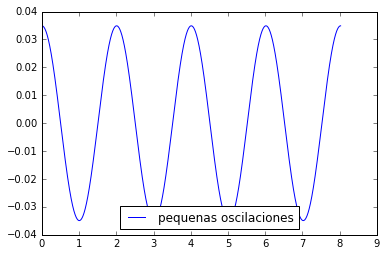

In [2]:
# Constantes
g = 9.8

# Condiciones iniciales
phi_t0 = np.pi / 90.
w_t0 = 0.

# Solucion para pequenas oscilaciones
freq = np.sqrt(g)
t = np.linspace(0, 4 * 2 * np.pi / freq, 10000) # 4 ciclos
phi_po = phi_t0 * np.cos(freq * t)

plt.plot(t, phi_po, label='pequenas oscilaciones')

plt.legend(loc=8)

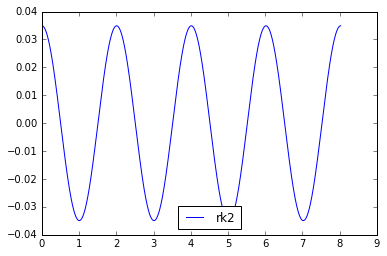

In [3]:
# Usando RK2

# h es el tamano del paso para cada iteracion!!

def f(phi, omega):
    output = [omega, -g * np.sin(phi)]
    return output


def calc_k1(f, phi_n, omega_n, h):
    fn = f(phi_n, omega_n)
    output = [h * fn[0], h * fn[1]]
    return output


def calc_k2(f, phi_n, omega_n, h):
    k1 = calc_k1(f, phi_n, omega_n, h)
    f_mid = f(phi_n + k1[0]/2, omega_n + k1[1]/2)
    output = [h * f_mid[0], h * f_mid[1]]
    return output


def rk2_step(f, phi_n, omega_n, h):
    k2 = calc_k2(f, phi_n, omega_n, h)
    phi_nxt = phi_n + k2[0]
    omega_nxt = omega_n + k2[1]
    output = [phi_nxt, omega_nxt]
    return output

Nsteps = 10000
h = 4 * 2 * np.pi / freq / Nsteps # tiempo / pasos

phi_arr = np.zeros(Nsteps)
omega_arr = np.zeros(Nsteps)

# Condiciones iniciales
phi_arr[0] = phi_t0
omega_arr[0] = w_t0

for i in range(1, Nsteps):
    phi_arr[i], omega_arr[i] = rk2_step(f, phi_arr[i-1], omega_arr[i-1], h)
    
plt.plot(t, phi_arr, label='rk2')

plt.legend(loc=8)

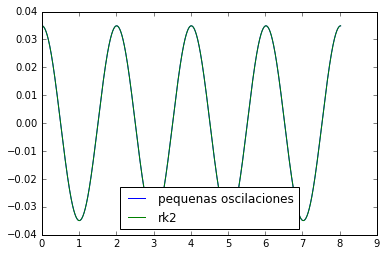

In [4]:
# Comparacion de ambos resultados
plt.plot(t, phi_po, label='pequenas oscilaciones')
plt.plot(t, phi_arr, label='rk2', color='green')

plt.legend(loc=8)

# Catedra 11

## Runge-Kutta 3

Este algoritmo sigue la misma idea que el algoritmo de Runge Kutta de orden 2, solo que en este hay que lidiar con derivadas de orden 3.

$$
k_1 = hf\left(x_n,\,\, y_n\right)
$$

$$
k_2 = hf\left(x_n + \frac{h}{2},\,\, y_n + \frac{k_1}{2}\right)
$$

$$
k_3 = hf\left(x_n + h,\,\, y_n - k_1 -2k_2\right)
$$

$$
y_{n+1} = y_n + \frac{1}{6}\left(k_1 + 4k_2 + k_3\right) + O\left(h^4\right)
$$

## Runge-Kutta 4

Misma idea que los anteriores, solo que hay derivadas de orden 4.

$$
k_1 = hf\left(x_n,\,\, y_n\right)
$$

$$
k_2 = hf\left(x_n + \frac{h}{2},\,\, y_n + \frac{k_1}{2}\right)
$$

$$
k_3 = hf\left(x_n + \frac{h}{2},\,\, y_n + \frac{k_2}{2}\right)
$$

$$
k_4 = hf\left(x_n + h,\,\, y_n + k_3\right)
$$

$$
y_{n+1} = y_n + \frac{k_1}{6} + \frac{k_2}{3} + \frac{k_3}{3} + \frac{k_4}{6} + O\left(h^5\right)
$$

El algoritmo de Runge-Kutta 4 es mas preciso que los anteriores, pero, es estable? La repuesta a esa pregunta depende fuertemente del problema a resolver.

A continuacion se analiza la estabilidad de Runge-Kutta 4 para un problema determinado.

### Estabilidad de Runge-Kutta 4

Consideremos $$\frac{dx}{dy} = \lambda y$$ Supongamos que $$ y_n = \bar{y}_n + \epsilon_n$$

Luego

$$
k_1 = hf\left(x_n,\,\, y_n\right) = h\lambda y_n
$$

$$
k_2 = hf\left(x_n + \frac{h}{2},\,\, y_n + \frac{k_1}{2}\right) = h\lambda\left(1+\frac{h}{2}\right) y_n
$$

$$
k_3 = h\lambda\left(1 + \frac{h\lambda}{2}\left(1 + \frac{h\lambda}{2}\right)\right) y_n
$$

$$
k_4 = h\lambda\left(1 + h\lambda\left(1 + \frac{h\lambda}{2}\left(1 + \frac{h\lambda}{2}\right)\right)\right)y_n
$$

$$
\bar{y}_{n+1} + \epsilon_{n+1} = \bar{y}_n + \epsilon_n + k_4\left(\bar{y}_n + \epsilon_n\right)
$$

$$
\epsilon_{n+1} = \epsilon_n\left[1 + h\lambda + \frac{(h\lambda)^2}{2} + \frac{(h\lambda)^3}{6} + \frac{(h\lambda)^4}{24}\right]
$$

Para que el algoritmo sea estable se debe cumplir que $-2.7853 < h\lambda < 0$

### Paso adaptativo

Ecuacion: $$\ddot{x} = \frac{\dot{x}}{t} - 4kt^2x$$

$$\frac{dx}{dt} = v$$

$$\frac{dv}{dt} = \frac{v}{t} - 4kt^2x$$

Solucion analitica:

$$ x(t) = \sin(\sqrt{k}t) $$

### Implementacion

Paso redoblado: Cada paso se da 2 veces
1. Con paso tamano $2h$
2. Con paso tamano $h$ + otro paso tamano $h$

Con paso $2h:\quad y(x+2h) = y_1+\left(2h\right)^5*const + O\left(h^6\right)$

Con paso $h:\quad y(x+2h) = y_2+\left(2h\right)^5*const + O\left(h^6\right)$

### Segunda implementacion

1. Un paso $h$, con RK4
2. Un paso $h$, con RK5

Llamando $h_0$ al tamano relativo del paso se tiene: 

$$
\frac{h_0}{h_1} = \left(\frac{\Delta_0}{\Delta_1}\right)^{1/5}
$$

El exponente depende del algoritmo y el cuociente de deltas corresponde al tamano del error.